# Deep Learning Project with Cifar10

In this project we will construct a deep learning model, we start from zero until we gonna build a better model unsing diferent technics. This notebook contains a basic model.

In [29]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from tensorflow import keras
from keras.utils import to_categorical
from keras.layers import Flatten, Dense

In [30]:
# CARGAR DATOS
cifar_10 = keras.datasets.cifar10

# Data Split
(x_train_completo, y_train_completo), (x_test,y_test) = cifar_10.load_data()

In [31]:
x_train_completo.shape

(50000, 32, 32, 3)

In [32]:
# Data Standaritation
# X_trains
x_valid, x_train = x_train_completo[:5000]/255, x_train_completo[5000:]/255

# Y_trains
y_valid, y_train = y_train_completo[:5000]/255, y_train_completo[5000:]/255

# X_test
x_test = x_test/255

In [33]:
class_name = ['avion', 'coche', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']

## 1. Testing the Image
Let's show two images from dataset.

This image belongs to the class gato


/var/folders/fm/f0cwhq8j4kq9xqtssrxv062m0000gn/T/ipykernel_49372/3962997645.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gato = class_name[int(y_test[0])]


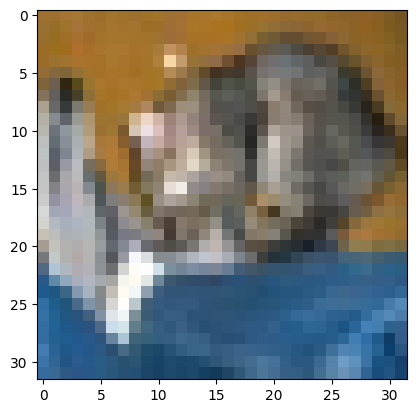

In [34]:
gato = class_name[int(y_test[0])]
print(f'This image belongs to the class {gato}')

plt.imshow(np.squeeze(x_test[0]))
plt.show();

This image belongs to the class rana


/var/folders/fm/f0cwhq8j4kq9xqtssrxv062m0000gn/T/ipykernel_49372/2371659709.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rana = class_name[int(y_test[5])]


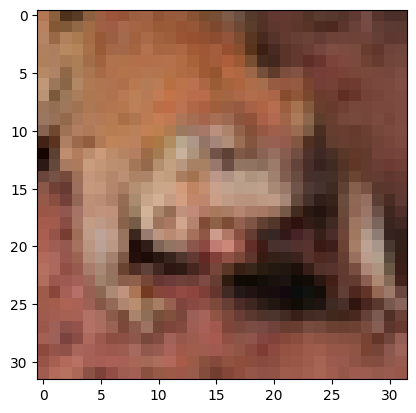

In [35]:
rana = class_name[int(y_test[5])]
print(f'This image belongs to the class {rana}')

plt.imshow(np.squeeze(x_test[5]))
plt.show();

This image belongs to the class avion


/var/folders/fm/f0cwhq8j4kq9xqtssrxv062m0000gn/T/ipykernel_49372/2224078183.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  avion = class_name[int(y_test[10])]


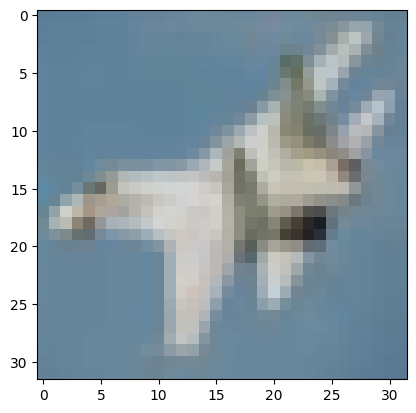

In [36]:
avion = class_name[int(y_test[10])]
print(f'This image belongs to the class {avion}')

plt.imshow(np.squeeze(x_test[10]))
plt.show();

**Observations.**

Watching the images it's very difficult to the model work with all this distortion in images. There are high probabilities to the model fail on the first training steps. However, let's see the next steps.

## 2.Creating Model

In [37]:
# creating model form a
model = keras.models.Sequential()

# model.add(keras.layers.Flatten(input_shape=[32,32,3]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

# model.summary()

# creating model form b
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

model.summary()

/Volumes/Korleone/Mac Backup/Dev/Vs Code/GitHub/DL_Cifar10/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       921,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 953,010 (3.64 MB)

 Trainable params: 953,010 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

In [39]:
# Compile Model
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='sgd',
    metrics=['accuracy'])

# training
entrenamiento = model.fit(x_train, y_train, 
                          epochs=15, 
                          validation_data=(x_valid, y_valid)
                          )

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1005 - loss: 0.0307 - val_accuracy: 0.1010 - val_loss: 5.1647e-04
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0998 - loss: 4.3170e-04 - val_accuracy: 0.1010 - val_loss: 2.5440e-04
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1000 - loss: 3.0481e-04 - val_accuracy: 0.1010 - val_loss: 1.6611e-04
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1009 - loss: 2.5430e-04 - val_accuracy: 0.1010 - val_loss: 1.2168e-04
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1003 - loss: 1.7594e-04 - val_accuracy: 0.1010 - val_loss: 9.4964e-05
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0971 - loss: 1.2259e-04 - val_accuracy: 0.1010 - val_loss: 7.7240e-05
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1010 - loss: 1.7540e-04 - val_accuracy: 0.1010 - val_loss: 6.4752e-05
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━

## Processing Results

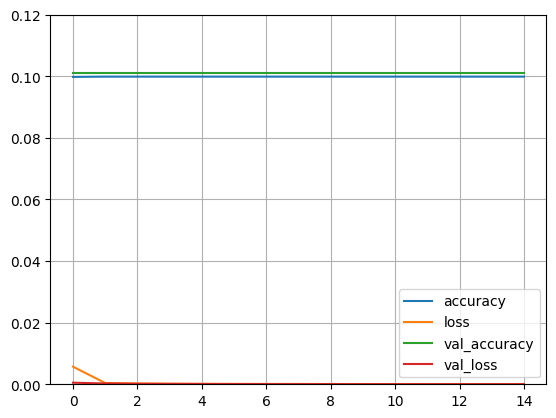

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1001 - loss: 24.1533


[24.0280818939209, 0.10000000149011612]

In [40]:
pd.DataFrame(entrenamiento.history).plot()
plt.grid()
plt.gca().set_ylim(0,0.12)
plt.show();

model.evaluate(x_test, y_test)

**Observations**

The loss was in 24% and the accuracy just was 10%, this model definitely not works. Let's gonna work with some technics to better our model.

## Bettering the Model with OHE

In [41]:
num_class = len(np.unique(y_train))

y_train = tf.keras.utils.to_categorical(y_train_completo,num_class)
y_test  = tf.keras.utils.to_categorical(y_test,num_class)

x_train  = x_train_completo.astype('float32')
x_test   = x_test.astype('float32')
x_train /= 255
x_test  /= 255

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print(x_train.shape[0], 'train samples')
print(x_test.shape[0] , 'test samples')
print(x_valid.shape[0], 'valid samples')

45000 train samples
10000 test samples
5000 valid samples


In [42]:
model = keras.models.Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(1000, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
    ])

model.summary()

/Volumes/Korleone/Mac Backup/Dev/Vs Code/GitHub/DL_Cifar10/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1000)           │     3,073,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,590,642 (13.70 MB)

 Trainable params: 3,590,642 (13.70 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Compile Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

cifar_model = model.fit(x_train, y_train,
                        epochs=10,
                        validation_data=(x_valid, y_valid)
                        )

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2500 - loss: 2.3392 - val_accuracy: 0.3164 - val_loss: 1.9309
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3834 - loss: 1.7261 - val_accuracy: 0.3492 - val_loss: 1.8220
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4145 - loss: 1.6399 - val_accuracy: 0.4142 - val_loss: 1.6456
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4272 - loss: 1.6080 - val_accuracy: 0.3570 - val_loss: 1.8076
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4424 - loss: 1.5752 - val_accuracy: 0.3848 - val_loss: 1.8243
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4492 - loss: 1.5526 - val_accuracy: 0.3944 - val_loss: 1.7627
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4583 - loss: 1.5295 - val_accuracy: 0.4022 - val_loss: 1.7006
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4612 -

## Results with OHE

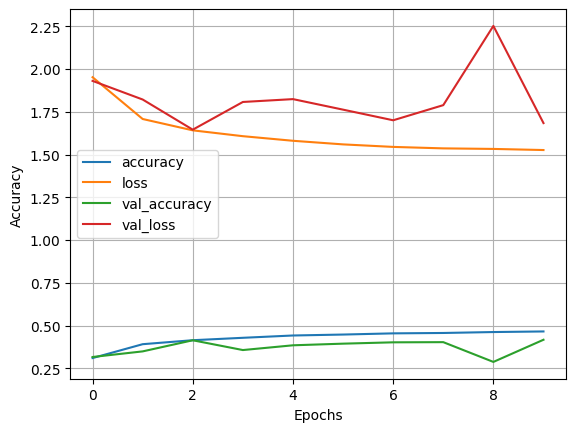

Evaluación del Modelo Hist
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1036 - loss: 4.2760


[4.280316352844238, 0.10000000149011612]

In [44]:
pd.DataFrame(cifar_model.history).plot()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show();

print('Evaluación del Modelo Hist')
model.evaluate(x_test, y_test)

## Predictions

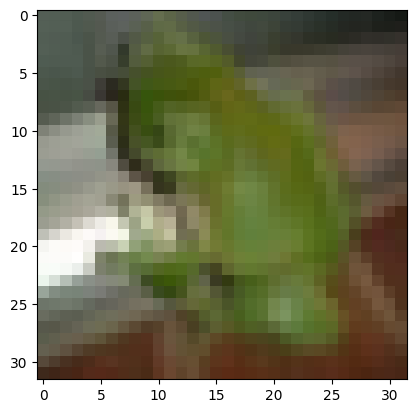

In [45]:
x_nuevo = x_test[7:8]

plt.imshow(np.squeeze(x_nuevo[0]*255))

In [46]:
y_proba = model.predict(x_nuevo)
print(y_proba.round(2))

class_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.   0.   0.23 0.05 0.17 0.02 0.52 0.01 0.   0.  ]]


['avion',
 'coche',
 'pajaro',
 'gato',
 'venado',
 'perro',
 'rana',
 'caballo',
 'barco',
 'camion']

In [47]:
# saving model
model.save('cifar_basic.h5')

**CONCLUSIONS**

Our model is basic jet. To get a better model we gonna create a new notebook with different technics for increase the results on our deep learning model.